In [189]:
import pandas as pd 
import torch 
from torch_geometric.data import Data

from sklearn.neighbors import kneighbors_graph

from pathlib import Path

In [190]:
path_data = Path("~/github/iaam-data-curation/data")

In [191]:
labels = pd.read_parquet(
            path_data.joinpath("Deteccion-Fauna-P1_ECP_IV-test.parquet")
)
len(labels.audio.unique())

807

In [192]:
fauna_by_audio = labels.groupby("audio")["fauna"].agg(sum)
fauna_by_audio[fauna_by_audio > 0].sort_values(ascending=False)

/tmp/ipykernel_388691/15535647.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  fauna_by_audio = labels.groupby("audio")["fauna"].agg(sum)


audio
1687978462.8386_1687978522.8387.wav    9
1687977792.8234_1687977852.8235.wav    4
1687978401.8366_1687978461.8367.wav    4
1688009055.2355_1688009115.2356.wav    3
1687979194.839_1687979254.8391.wav     3
                                      ..
1687995406.214_1687995466.214.wav      1
1687994125.7027_1687994185.7028.wav    1
1687991199.0385_1687991259.0386.wav    1
1687987360.9388_1687987420.9388.wav    1
1687999183.1635_1687999243.1636.wav    1
Name: fauna, Length: 90, dtype: int64

In [170]:
data = pd.read_parquet(
            path_data.joinpath("Embeddings-P1_ECP_IV-test.parquet")
)
data

,0,1,2,3,4,5,6,7,8,9,...,1018,1019,1020,1021,1022,1023,audio,canal,fecha,tiempo
index,,,,,,,,,,,,,,,,,,,,,
8556,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.036859,0.0,0.0,...,0.0,0.0,0.000000,1.267192,0.0,0.0,1687964701.6709_1687964761.671.wav,1,2023-06-28 11:05:01,0.00
8557,0.0,0.0,0.024448,0.000000,0.0,0.0,0.0,0.000069,0.0,0.0,...,0.0,0.0,0.035686,0.848677,0.0,0.0,1687964701.6709_1687964761.671.wav,1,2023-06-28 11:05:01,0.48
8558,0.0,0.0,0.000000,0.048197,0.0,0.0,0.0,0.005053,0.0,0.0,...,0.0,0.0,0.000000,0.587311,0.0,0.0,1687964701.6709_1687964761.671.wav,1,2023-06-28 11:05:01,0.96
8559,0.0,0.0,0.000000,0.160359,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.801761,0.000000,0.0,0.0,1687964701.6709_1687964761.671.wav,1,2023-06-28 11:05:01,1.44
8560,0.0,0.0,0.000000,0.081580,0.0,0.0,0.0,0.045440,0.0,0.0,...,0.0,0.0,0.220478,0.030548,0.0,0.0,1687964701.6709_1687964761.671.wav,1,2023-06-28 11:05:01,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108551,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.368467,0.0,0.0,...,0.0,0.0,0.001932,0.101344,0.0,0.0,1688013806.7699_1688013866.77.wav,1,2023-06-29 00:43:26,24.48
108552,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.090953,0.0,0.0,...,0.0,0.0,0.000000,0.680018,0.0,0.0,1688013806.7699_1688013866.77.wav,1,2023-06-29 00:43:26,24.96
108553,0.0,0.0,0.030956,0.000000,0.0,0.0,0.0,0.214912,0.0,0.0,...,0.0,0.0,0.000000,0.654883,0.0,0.0,1688013806.7699_1688013866.77.wav,1,2023-06-29 00:43:26,25.44


In [171]:
emb, metadata = data[:][data.columns[:1024]].to_numpy(), data[:][["audio","canal","fecha","tiempo"]]
list_audios = list(metadata.audio.unique())


In [172]:
name_audio = "1687978462.8386_1687978522.8387.wav"
num_audio = list_audios.index(name_audio)
idx_audio  = metadata[metadata.audio == list_audios[num_audio]].index

In [173]:
emb[idx_audio.to_numpy(),:]

array([[0.        , 0.        , 0.        , ..., 1.07098162, 0.        ,
        0.        ],
       [0.        , 0.        , 0.01614763, ..., 1.25082231, 0.        ,
        0.        ],
       [0.        , 0.        , 0.07021725, ..., 0.71797901, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.46751916, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.04859447, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.09242773, 0.        ,
        0.        ]])

In [174]:
A = kneighbors_graph(emb[idx_audio.to_numpy(),:], n_neighbors=3)
n_nodes = A.toarray().shape[0]

In [187]:
import numpy as np
import networkx as nx 

import matplotlib.pyplot as plt

In [176]:
rows,cols=np.where(A.toarray()==1)

In [177]:
edges = [[r,c] for r,c in zip(rows,cols)]

In [178]:
G = nx.Graph()

In [179]:
G.add_edges_from(edges)

In [180]:
print(G)

Graph with 124 nodes and 282 edges


In [197]:
node_labels = list(labels.fauna[idx_audio.to_numpy()])

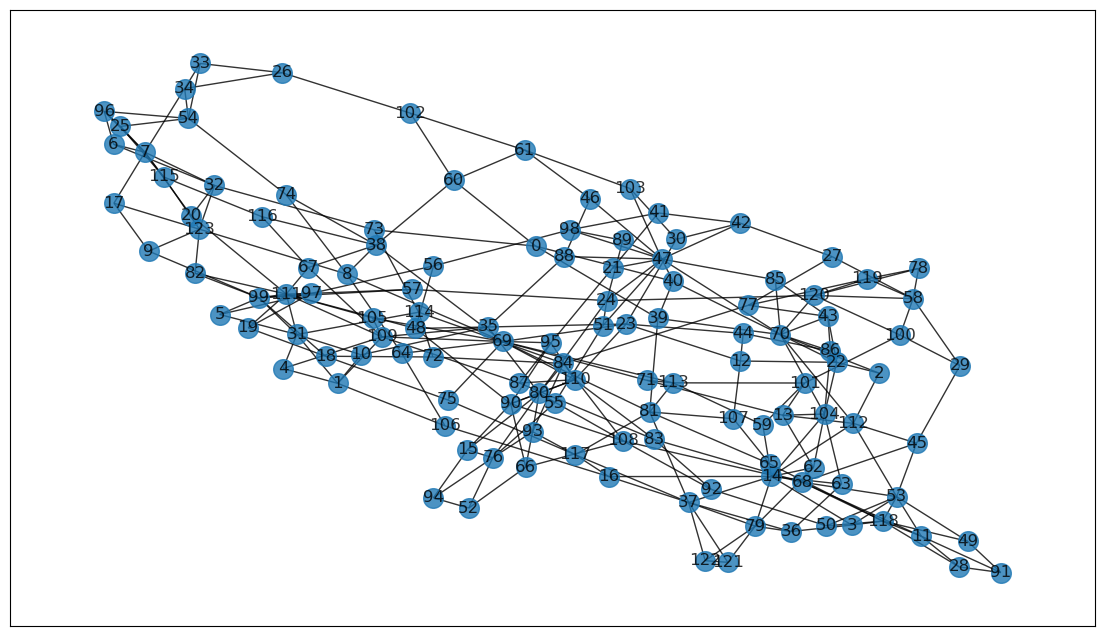

In [188]:
pos_layout = nx.drawing.layout.bfs_layout(G,start=0),
pos_layout = nx.spring_layout(G, iterations=1000)

fig, ax= plt.subplots(1,1,figsize=(14,8),dpi=100)
nx.draw_networkx(   
    G, 
    pos=pos_layout,
    node_color = node_labels,  
    node_size=200,
    alpha=0.8,
    )